# Plot: Dependence on Break Locations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'C:/Users/Meier/Dropbox (Institut für Statistik)/Structural Breaks + DL/Figures/' 
#path = 'C:/Users/Johan/Dropbox (Institut für Statistik)/Structural Breaks + DL/Figures/'

In [3]:
SMALL_SIZE = 26
MEDIUM_SIZE = 28
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

Load data:

In [4]:
with np.load(path+'Results/Plot_RNN_preds.npz') as data:
    rnn_preds_mean = data['mean']
    rnn_preds_std = data['std']
with np.load(path+'Results/Plot_LSTM_preds.npz') as data:
    lstm_preds_mean = data['mean']
    lstm_preds_std = data['std']
with np.load(path+'Results/Plot_GRU_preds.npz') as data:
    gru_preds_mean = data['mean']
    gru_preds_std = data['std']

Plot:

In [5]:
tau = np.arange(0,0.9,0.05)
y1 = np.zeros(rnn_preds_mean.shape[0])
y2 = 0.5*np.ones(rnn_preds_mean.shape[0])

In [6]:
cmap = plt.get_cmap("tab20c")

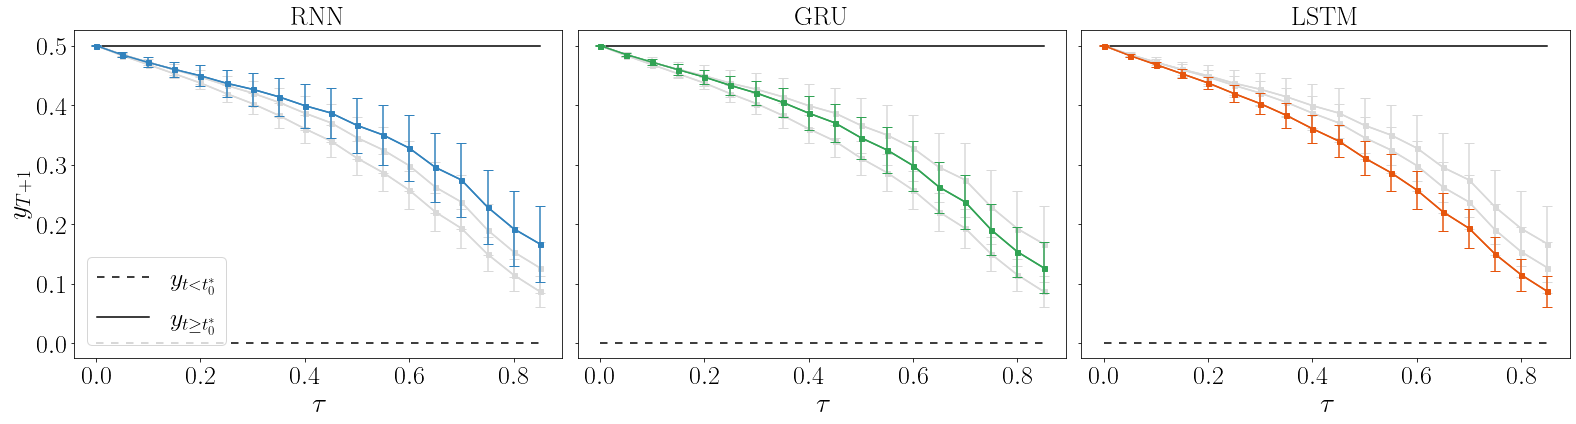

In [7]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(22,6))

ax[0].plot(tau, y1,label=r'$y_{t<t_0^*}$', color='black', linestyle=(0, (5, 5)))
ax[0].plot(tau, y2,label=r'$y_{t\geq t_0^*}$', color='black')
ax[0].plot(tau, lstm_preds_mean[:,0], color=cmap(19))
ax[0].errorbar(tau, lstm_preds_mean[:,0], lstm_preds_std[:,0], capsize=5, color=cmap(19), marker='s', ms=5)
ax[0].plot(tau, gru_preds_mean[:,0], color=cmap(19))
ax[0].errorbar(tau, gru_preds_mean[:,0], gru_preds_std[:,0], capsize=5, color=cmap(19), marker='s', ms=5)
ax[0].plot(tau, rnn_preds_mean[:,0], color=cmap(0))
ax[0].errorbar(tau, rnn_preds_mean[:,0], rnn_preds_std[:,0], capsize=5, color=cmap(0), marker='s', ms=5, zorder=3)
ax[0].set_title('RNN')
ax[0].set_xlabel(r'$\tau$')
ax[0].set_ylabel(r'$y_{T+1}$')
ax[0].set_yticks([0,0.1,0.2,0.3,0.4,0.5])
ax[0].legend(loc='lower left')

ax[1].plot(tau, y1,label=r'$y_{t<t_0^*}$', color='black', linestyle=(0, (5, 5)))
ax[1].plot(tau, y2,label=r'$y_{t\geq t_0^*}$', color='black')
ax[1].plot(tau, rnn_preds_mean[:,0], color=cmap(19))
ax[1].errorbar(tau, rnn_preds_mean[:,0], rnn_preds_std[:,0], capsize=5, color=cmap(19), marker='s', ms=5)
ax[1].plot(tau, lstm_preds_mean[:,0], color=cmap(19))
ax[1].errorbar(tau, lstm_preds_mean[:,0], lstm_preds_std[:,0], capsize=5, color=cmap(19), marker='s', ms=5)
ax[1].plot(tau, gru_preds_mean[:,0], color=cmap(8))
ax[1].errorbar(tau, gru_preds_mean[:,0], gru_preds_std[:,0], capsize=5, color=cmap(8), marker='s', ms=5, zorder=3)
ax[1].set_title('GRU')
ax[1].set_xlabel(r'$\tau$')

ax[2].plot(tau, y1,label=r'$y_{t<t_0^*}$', color='black', linestyle=(0, (5, 5)))
ax[2].plot(tau, y2,label=r'$y_{t\geq t_0^*}$', color='black')
ax[2].plot(tau, rnn_preds_mean[:,0], color=cmap(19))
ax[2].errorbar(tau, rnn_preds_mean[:,0], rnn_preds_std[:,0], capsize=5, color=cmap(19), marker='s', ms=5)
ax[2].plot(tau, gru_preds_mean[:,0], color=cmap(19))
ax[2].errorbar(tau, gru_preds_mean[:,0], gru_preds_std[:,0], capsize=5, color=cmap(19), marker='s', ms=5)
ax[2].plot(tau, lstm_preds_mean[:,0], color=cmap(4))
ax[2].errorbar(tau, lstm_preds_mean[:,0], lstm_preds_std[:,0], capsize=5, color=cmap(4), marker='s', ms=5, zorder=3)
ax[2].set_title('LSTM')
ax[2].set_xlabel(r'$\tau$')

plt.tight_layout()
plt.savefig(path+'BreakLocationDependence.pdf', bbox_inches='tight')
plt.show()